# 분석시나리오 4,5

In [1]:
# 소비데이터불러오기

# 선언
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

In [3]:
card = 'data\p_card4.xlsx'

In [4]:
card_df = pd.read_excel(card, sheet_name = '원자료',engine='openpyxl')
card_df.head(1)

,통계표,지역코드,소비유형코드,금액구분코드,단위,변환,2019/01,2019/02,2019/03,2019/04,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
0,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,총액,백만원,원자료,44936072,38921767,44496876,43591233,...,51219562,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608


In [ ]:
len(card_df)

In [ ]:
card_df.info()

In [ ]:
# null 값 확인
# 열별
# card_df.isnull().sum()

In [ ]:
# 행별
# card_df.isnull().sum(1)

In [5]:
# 필요없는 컬럼 삭제

del card_df['통계표']
del card_df['변환'] 
# 단위는 백만원이다.
del card_df['단위'] 
card_df

#두칸 공백이 있으면 소분류이다.

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
0,전국,합계,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,...,51219562,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608
1,전국,합계,월간 일평균,1449551,1390063,1435383,1453041,1487396,1453151,1490697,...,1652244,1673664,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,7435797,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129
3,전국,종합소매,월간 일평균,216704,215936,216062,220543,229455,223049,222520,...,239864,229936,225889,235818,249490,238870,250262,235457,246281,223755
4,전국,백화점,총액,1259884,1145085,1351477,1279599,1390518,1217059,1216038,...,1550293,1332067,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,기타,공과금/개인 및 전문 서비스,월간 일평균,545,442,426,425,565,404,526,...,298,306,435,326,421,341,254,289,402,301
1472,기타,금융/보험,총액,14083,12629,15079,13141,14256,13391,13580,...,11433,11404,12081,10616,11013,10427,9347,10863,9708,9109
1473,기타,금융/보험,월간 일평균,454,451,486,438,460,446,438,...,369,380,390,342,367,336,312,350,313,325
1474,기타,기타,총액,17491,13730,15801,15987,16291,15670,17030,...,11466,11373,13168,10204,11005,9802,10007,9944,11564,8890


In [6]:
# 소분류, 대분류 붙이기

merc = list()

for x in range(len(card_df)):
    if len(card_df['소비유형코드'][x].split(' '))==1:
        merc.append('대분류')
    else: 
        merc.append('소분류')
        
merc

['대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',


In [ ]:
len(merc)

In [7]:
# 원래 DataFrame에 붙이기
card_df['대소분류구분'] = merc
card_df

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분
0,전국,합계,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,...,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류
1,전국,합계,월간 일평균,1449551,1390063,1435383,1453041,1487396,1453151,1490697,...,1673664,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629,대분류
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류
3,전국,종합소매,월간 일평균,216704,215936,216062,220543,229455,223049,222520,...,229936,225889,235818,249490,238870,250262,235457,246281,223755,대분류
4,전국,백화점,총액,1259884,1145085,1351477,1279599,1390518,1217059,1216038,...,1332067,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777,소분류
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,기타,공과금/개인 및 전문 서비스,월간 일평균,545,442,426,425,565,404,526,...,306,435,326,421,341,254,289,402,301,소분류
1472,기타,금융/보험,총액,14083,12629,15079,13141,14256,13391,13580,...,11404,12081,10616,11013,10427,9347,10863,9708,9109,대분류
1473,기타,금융/보험,월간 일평균,454,451,486,438,460,446,438,...,380,390,342,367,336,312,350,313,325,대분류
1474,기타,기타,총액,17491,13730,15801,15987,16291,15670,17030,...,11373,13168,10204,11005,9802,10007,9944,11564,8890,대분류


In [ ]:
# 전국 데이터로 코로나 전,후 기간 나누기 및 정하기
area_seg = (card_df.지역코드=='전국') & (card_df.금액구분코드=='총액') & (card_df.소비유형코드=='합계')#특정조건만
card_all = card_df[area_seg]
card_all

In [ ]:
# card_all : 기간별 합계
# case1 : 년도별 합계 -> 연도로 나눈다.

In [ ]:
# 2019/01 ~ 2019/12  = [3] ~ [15]  #코로나 전
# 2020/01 ~ 2020/12  = [15] ~ [27] #코로나 기간
# 2021/01 ~ 2021/12  = [27] ~ [39] #코로나 후 +1
# 2022/01 ~ 2022/02  = [39] ~ [41] #코로나 후 +2

# card_all.iloc[:,39:41]

card_all_2019 = card_all.iloc[:,3:15] 
card_all['2019'] = card_all_2019.sum(axis=1)
 
card_all_2020 = card_all.iloc[:,15:27] 
card_all['2020'] = card_all_2020.sum(axis=1)

card_all_2021 = card_all.iloc[:,27:39] 
card_all['2021'] = card_all_2021.sum(axis=1)

card_all_2022 = card_all.iloc[:,39:41] 
card_all['2022'] = card_all_2022.sum(axis=1)

card_all

In [8]:
# 업종 대분류별 증감
# 증감율 : 코로나 1차 (2020년 - 2019년) / 2019년
# 대분류 업종별, 전국 매출액

# 특정조건만, 전국, 총액, 합계 빼고
merc_seg = (card_df.지역코드=='전국') & (card_df.금액구분코드=='총액') & (card_df.소비유형코드!='합계') & (card_df.대소분류구분=='대분류') 

card_merc = card_df[merc_seg]
card_merc

# card_merc2 = card_all[merc_seg]
# card_merc2

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류
14,전국,전자상거래/통신판매,총액,7595436,6670919,7741855,7495993,7817066,7285161,7836989,...,11332876,11921832,11762070,11733727,12498677,12988975,13200630,13162164,11902937,대분류
16,전국,식료품,총액,838711,778584,703205,697603,760900,709244,679288,...,843926,852405,921161,1265704,977925,975218,1001439,1285590,798669,대분류
22,전국,의류/잡화,총액,1132901,1001630,1241781,1201059,1317136,1178323,1108101,...,1031048,952645,847157,1008459,1210118,1139854,1082268,977024,793406,대분류
32,전국,연료,총액,2507052,2216700,2524854,2504898,2716282,2583850,2566747,...,2607119,2801180,2728556,2627140,2928012,3007486,3004262,2946530,2632130,대분류
34,전국,가구/가전,총액,1262882,1163903,1430280,1268250,1428125,1230078,1313486,...,1328889,1517272,1383383,1184915,1306848,1301222,1152933,1283768,1187513,대분류
40,전국,의료/보건,총액,3633792,3066496,3487020,3368808,3528229,3373985,3492110,...,3825910,3941412,3741396,3549924,4033402,3879853,4095031,4183821,3652065,대분류
46,전국,자동차,총액,2195702,1956543,2575204,2463015,2478845,2256471,2321229,...,3055501,3010513,2546455,2322181,2757606,2862530,2996016,2326235,2321611,대분류
54,전국,여행/교통,총액,1247162,1047980,1110523,1168304,1188161,1120378,1244302,...,660371,577479,545371,584841,697987,771992,620872,642424,539946,대분류
62,전국,오락/문화,총액,1190510,1101948,1450682,1369465,1497833,1405616,1386808,...,1427493,1345177,1274088,1369642,1574476,1484822,1272392,1133765,1020406,대분류


In [9]:
card_merc_2019 = card_merc.iloc[:,3:15] 
card_merc['2019'] = card_merc_2019.sum(axis=1)
 
card_merc_2020 = card_merc.iloc[:,15:27] 
card_merc['2020'] = card_merc_2020.sum(axis=1)

card_merc_2021 = card_merc.iloc[:,27:39] 
card_merc['2021'] = card_merc_2021.sum(axis=1)

card_merc_2022 = card_merc.iloc[:,39:41] 
card_merc['2022'] = card_merc_2022.sum(axis=1)

card_merc

C:\Users\student\AppData\Local\Temp\ipykernel_1860\3637948679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_merc['2019'] = card_merc_2019.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_1860\3637948679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_merc['2020'] = card_merc_2020.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_1860\3637948679.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분,2019,2020,2021,2022
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,7404979,7507863,7299173,7634707,6265129,대분류,81715140,79868221,85135882,13899836
14,전국,전자상거래/통신판매,총액,7595436,6670919,7741855,7495993,7817066,7285161,7836989,...,12498677,12988975,13200630,13162164,11902937,대분류,93396977,116325130,140920641,25065101
16,전국,식료품,총액,838711,778584,703205,697603,760900,709244,679288,...,977925,975218,1001439,1285590,798669,대분류,9245565,10266212,11354587,2084259
22,전국,의류/잡화,총액,1132901,1001630,1241781,1201059,1317136,1178323,1108101,...,1210118,1139854,1082268,977024,793406,대분류,14010886,11586564,12008740,1770430
32,전국,연료,총액,2507052,2216700,2524854,2504898,2716282,2583850,2566747,...,2928012,3007486,3004262,2946530,2632130,대분류,31078595,27031131,32051237,5578660
34,전국,가구/가전,총액,1262882,1163903,1430280,1268250,1428125,1230078,1313486,...,1306848,1301222,1152933,1283768,1187513,대분류,15099752,16095290,15790436,2471281
40,전국,의료/보건,총액,3633792,3066496,3487020,3368808,3528229,3373985,3492110,...,4033402,3879853,4095031,4183821,3652065,대분류,41557715,41788064,45243818,7835886
46,전국,자동차,총액,2195702,1956543,2575204,2463015,2478845,2256471,2321229,...,2757606,2862530,2996016,2326235,2321611,대분류,28502158,34476890,33732074,4647846
54,전국,여행/교통,총액,1247162,1047980,1110523,1168304,1188161,1120378,1244302,...,697987,771992,620872,642424,539946,대분류,13832202,6606730,7178093,1182370
62,전국,오락/문화,총액,1190510,1101948,1450682,1369465,1497833,1405616,1386808,...,1574476,1484822,1272392,1133765,1020406,대분류,16295958,14126877,15711387,2154171


In [10]:
# 월평균 매출액

card_merc['19월평균'] = round(card_merc['2019']/12,0)
card_merc['20월평균'] = round(card_merc['2020']/12,0)
card_merc['21월평균'] = round(card_merc['2021']/12,0)
card_merc['22월평균'] = round(card_merc['2022']/2,0)
card_merc

C:\Users\student\AppData\Local\Temp\ipykernel_1860\2277049738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_merc['19월평균'] = round(card_merc['2019']/12,0)
C:\Users\student\AppData\Local\Temp\ipykernel_1860\2277049738.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_merc['20월평균'] = round(card_merc['2020']/12,0)
C:\Users\student\AppData\Local\Temp\ipykernel_1860\2277049738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2022/02,대소분류구분,2019,2020,2021,2022,19월평균,20월평균,21월평균,22월평균
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,6265129,대분류,81715140,79868221,85135882,13899836,6809595.0,6655685.0,7094657.0,6949918.0
14,전국,전자상거래/통신판매,총액,7595436,6670919,7741855,7495993,7817066,7285161,7836989,...,11902937,대분류,93396977,116325130,140920641,25065101,7783081.0,9693761.0,11743387.0,12532550.0
16,전국,식료품,총액,838711,778584,703205,697603,760900,709244,679288,...,798669,대분류,9245565,10266212,11354587,2084259,770464.0,855518.0,946216.0,1042130.0
22,전국,의류/잡화,총액,1132901,1001630,1241781,1201059,1317136,1178323,1108101,...,793406,대분류,14010886,11586564,12008740,1770430,1167574.0,965547.0,1000728.0,885215.0
32,전국,연료,총액,2507052,2216700,2524854,2504898,2716282,2583850,2566747,...,2632130,대분류,31078595,27031131,32051237,5578660,2589883.0,2252594.0,2670936.0,2789330.0
34,전국,가구/가전,총액,1262882,1163903,1430280,1268250,1428125,1230078,1313486,...,1187513,대분류,15099752,16095290,15790436,2471281,1258313.0,1341274.0,1315870.0,1235640.0
40,전국,의료/보건,총액,3633792,3066496,3487020,3368808,3528229,3373985,3492110,...,3652065,대분류,41557715,41788064,45243818,7835886,3463143.0,3482339.0,3770318.0,3917943.0
46,전국,자동차,총액,2195702,1956543,2575204,2463015,2478845,2256471,2321229,...,2321611,대분류,28502158,34476890,33732074,4647846,2375180.0,2873074.0,2811006.0,2323923.0
54,전국,여행/교통,총액,1247162,1047980,1110523,1168304,1188161,1120378,1244302,...,539946,대분류,13832202,6606730,7178093,1182370,1152684.0,550561.0,598174.0,591185.0
62,전국,오락/문화,총액,1190510,1101948,1450682,1369465,1497833,1405616,1386808,...,1020406,대분류,16295958,14126877,15711387,2154171,1357996.0,1177240.0,1309282.0,1077086.0


In [37]:
# 코로나 1차 증감률 선정
card_merc['20증감률'] = ((card_merc['2020']-card_merc['2019'])/card_merc['2019'])*100
card_merc_order = card_merc.sort_values('20증감률')
card_minus_top3 = card_merc_order.head(3) #감소 top3
card_plus_top3 = card_merc_order.tail(3) #증가 top3

C:\Users\student\AppData\Local\Temp\ipykernel_1860\3098150622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_merc['20증감률'] = ((card_merc['2020']-card_merc['2019'])/card_merc['2019'])*100


In [38]:
card_minus_top3

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,대소분류구분,2019,2020,2021,2022,19월평균,20월평균,21월평균,22월평균,20증감률
54,전국,여행/교통,총액,1247162,1047980,1110523,1168304,1188161,1120378,1244302,...,대분류,13832202,6606730,7178093,1182370,1152684.0,550561.0,598174.0,591185.0,-52.236600
22,전국,의류/잡화,총액,1132901,1001630,1241781,1201059,1317136,1178323,1108101,...,대분류,14010886,11586564,12008740,1770430,1167574.0,965547.0,1000728.0,885215.0,-17.303131
68,전국,교육,총액,1138526,1074595,1200939,991952,1134549,1098704,1160300,...,대분류,13410642,11152757,12573137,2130330,1117554.0,929396.0,1047761.0,1065165.0,-16.836517


In [39]:
card_plus_top3

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,대소분류구분,2019,2020,2021,2022,19월평균,20월평균,21월평균,22월평균,20증감률
78,전국,금융/보험,총액,1733680,1605506,1829659,1775080,1828686,1766931,1902882,...,대분류,21882509,24989934,26883473,4373967,1823542.0,2082494.0,2240289.0,2186984.0,14.200497
46,전국,자동차,총액,2195702,1956543,2575204,2463015,2478845,2256471,2321229,...,대분류,28502158,34476890,33732074,4647846,2375180.0,2873074.0,2811006.0,2323923.0,20.962385
14,전국,전자상거래/통신판매,총액,7595436,6670919,7741855,7495993,7817066,7285161,7836989,...,대분류,93396977,116325130,140920641,25065101,7783081.0,9693761.0,11743387.0,12532550.0,24.549138


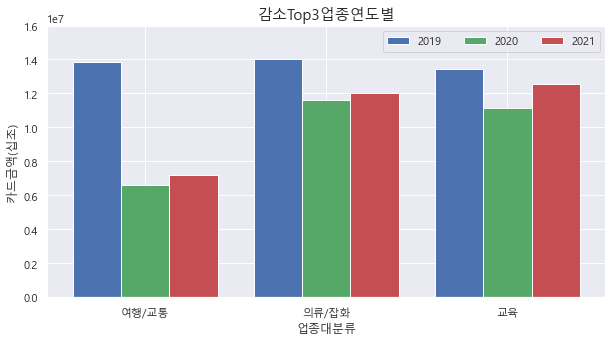

In [73]:
# 감소 top3 대분류 2019,2020,2021 그리기

data = [card_minus_top3['2019'],
        card_minus_top3['2020'],
        card_minus_top3['2021']]

color_list = ['b', 'g', 'r']
label_list = ['2019', '2020', '2021']

gap = .8 / len(data)
for i, row in enumerate(data):
    X = np.arange(len(row))
    plt.bar(X + i*gap, row, 
           width = gap, 
           color = color_list[i % len(color_list)],
           label = label_list[i % len(label_list)])
    
plt.xlabel('업종대분류')
plt.ylabel('카드금액(십조)')    
plt.legend(ncol=3)
plt.title('감소Top3업종연도별', fontsize=15)
plt.xticks(X + gap, card_minus_top3['소비유형코드'])
plt.rcParams['figure.figsize'] = (10,4)
plt.ylim([0, 16000000])

plt.show()

In [50]:
card_minus_top = card_minus_top3
card_minus_top = card_minus_top.drop(columns = ['지역코드','금액구분코드'])
# card_minus_top.drop(columns = ['지역코드','금액구분코드'],inplace=True)
# card_minus_top
card_minus_top = card_minus_top.set_index('소비유형코드')
card_minus_top
# card_minus_top3.iloc[:,0:38]
# np.arange(38)
# len(card_minus_top3.iloc[:,:38].columns)

,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,...,대소분류구분,2019,2020,2021,2022,19월평균,20월평균,21월평균,22월평균,20증감률
소비유형코드,,,,,,,,,,,,,,,,,,,,,
여행/교통,1247162,1047980,1110523,1168304,1188161,1120378,1244302,1141198,1016303,1147293,...,대분류,13832202,6606730,7178093,1182370,1152684.0,550561.0,598174.0,591185.0,-52.236600
의류/잡화,1132901,1001630,1241781,1201059,1317136,1178323,1108101,1020957,1075188,1263757,...,대분류,14010886,11586564,12008740,1770430,1167574.0,965547.0,1000728.0,885215.0,-17.303131
교육,1138526,1074595,1200939,991952,1134549,1098704,1160300,1260614,1065444,1080319,...,대분류,13410642,11152757,12573137,2130330,1117554.0,929396.0,1047761.0,1065165.0,-16.836517


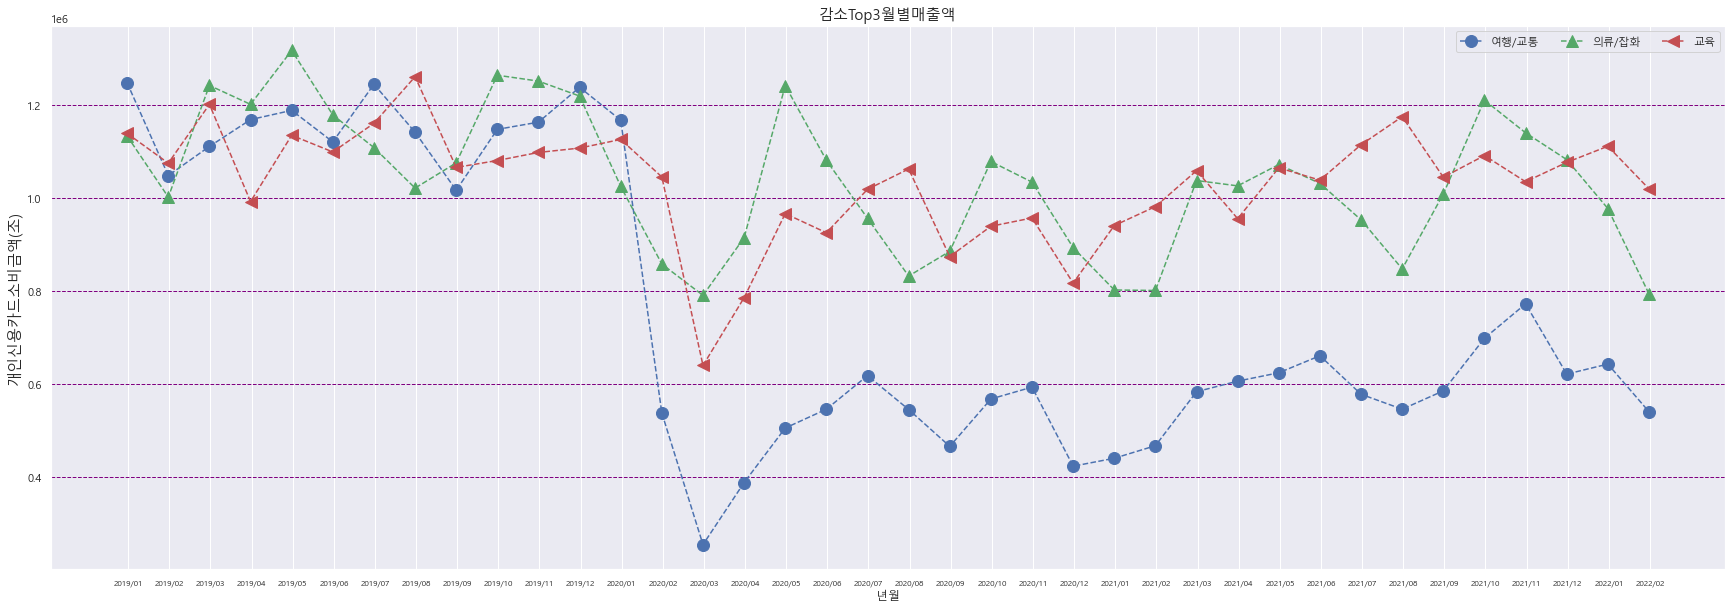

In [77]:
# 감소 대분류 top3 월별 매출액 그리기
plt.figure(figsize=(30,10))

t = np.arange(38)
y = card_minus_top.iloc[:,:38].values

color_list = ['b', 'g', 'r']
maker_list = ['o', '^', '<']

for idx in range(len(card_minus_top)):
    
    plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
            markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=card_minus_top.index[idx])

gap = .9 / len(card_minus_top.iloc[:,:38].columns)

plt.xticks(t + gap, card_minus_top.iloc[:,:38].columns, fontsize=8)
plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

plt.xlabel('년월')
plt.ylabel('개인신용카드소비금액(조)', fontsize=15)
plt.title('감소Top3월별매출액',fontsize=15)
plt.legend(ncol=3)
plt.rcParams['figure.figsize'] = (30,30)

plt.show()

In [60]:
card_plus_top3

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,대소분류구분,2019,2020,2021,2022,19월평균,20월평균,21월평균,22월평균,20증감률
78,전국,금융/보험,총액,1733680,1605506,1829659,1775080,1828686,1766931,1902882,...,대분류,21882509,24989934,26883473,4373967,1823542.0,2082494.0,2240289.0,2186984.0,14.200497
46,전국,자동차,총액,2195702,1956543,2575204,2463015,2478845,2256471,2321229,...,대분류,28502158,34476890,33732074,4647846,2375180.0,2873074.0,2811006.0,2323923.0,20.962385
14,전국,전자상거래/통신판매,총액,7595436,6670919,7741855,7495993,7817066,7285161,7836989,...,대분류,93396977,116325130,140920641,25065101,7783081.0,9693761.0,11743387.0,12532550.0,24.549138


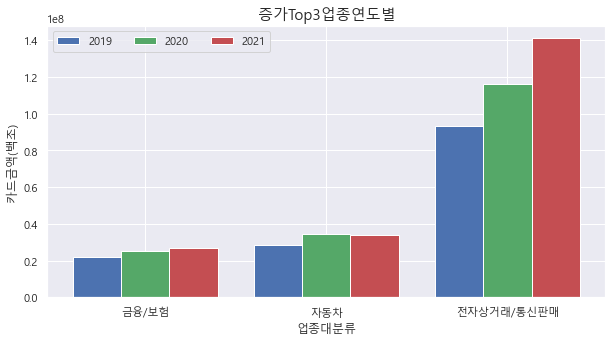

In [65]:
# 증가 top3 대분류 2019,2020,2021 그리기

data = [card_plus_top3['2019'],
        card_plus_top3['2020'],
        card_plus_top3['2021']]

color_list = ['b', 'g', 'r']
label_list = ['2019', '2020', '2021']

gap = .8 / len(data)
for i, row in enumerate(data):
    X = np.arange(len(row))
    plt.bar(X + i*gap, row, 
           width = gap, 
           color = color_list[i % len(color_list)],
           label = label_list[i % len(label_list)])
    
plt.xlabel('업종대분류')
plt.ylabel('카드금액(백조)')    
plt.legend(ncol=3)
plt.title('증가Top3업종연도별', fontsize=15)
plt.xticks(X + gap, card_plus_top3['소비유형코드'])

plt.show()

In [74]:
card_plus_top = card_plus_top3
card_plus_top = card_plus_top.drop(columns = ['지역코드','금액구분코드'])
card_plus_top = card_plus_top.set_index('소비유형코드')
card_plus_top
# card_minus_top3.iloc[:,0:38]
# np.arange(38)
# len(card_minus_top3.iloc[:,:38].columns)

,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,...,대소분류구분,2019,2020,2021,2022,19월평균,20월평균,21월평균,22월평균,20증감률
소비유형코드,,,,,,,,,,,,,,,,,,,,,
금융/보험,1733680,1605506,1829659,1775080,1828686,1766931,1902882,1842559,1794868,1923089,...,대분류,21882509,24989934,26883473,4373967,1823542.0,2082494.0,2240289.0,2186984.0,14.200497
자동차,2195702,1956543,2575204,2463015,2478845,2256471,2321229,2283828,2125179,2447276,...,대분류,28502158,34476890,33732074,4647846,2375180.0,2873074.0,2811006.0,2323923.0,20.962385
전자상거래/통신판매,7595436,6670919,7741855,7495993,7817066,7285161,7836989,7560020,7618476,8192105,...,대분류,93396977,116325130,140920641,25065101,7783081.0,9693761.0,11743387.0,12532550.0,24.549138


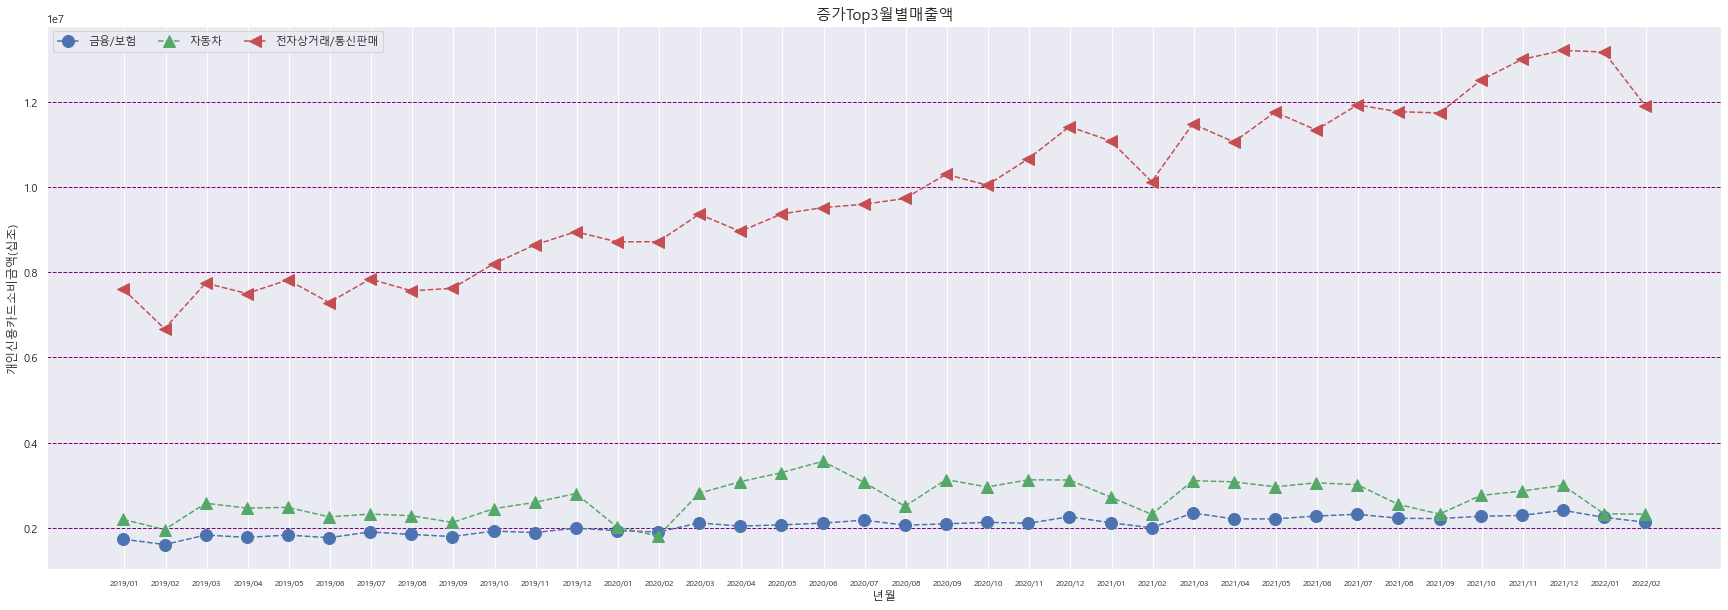

In [79]:
# 증가 대분류 top3 월별 매출액 그리기
plt.figure(figsize=(30,10))

t = np.arange(38)
y = card_plus_top.iloc[:,:38].values

color_list = ['b', 'g', 'r']
maker_list = ['o', '^', '<']

for idx in range(len(card_plus_top)):
    
    plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
            markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=card_plus_top.index[idx])

gap = .9 / len(card_plus_top.iloc[:,:38].columns)

plt.xticks(t + gap, card_plus_top.iloc[:,:38].columns, fontsize=8)
plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

plt.xlabel('년월')
plt.ylabel('개인신용카드소비금액(십조)')
plt.title('증가Top3월별매출액',fontsize=15)
plt.legend(ncol=3)

plt.show()

In [80]:
# 감소업종 소분류 -> 소분류 data 중 대분류의 index 연속값, 다음 대분류전까지
merc_seg2 = (card_df.지역코드=='전국') & (card_df.금액구분코드=='총액') & (card_df.소비유형코드!='합계') & (card_df.대소분류구분=='소분류') #특정조건만
card_merc2 = card_df[merc_seg2]
card_merc2

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분
4,전국,백화점,총액,1259884,1145085,1351477,1279599,1390518,1217059,1216038,...,1332067,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777,소분류
6,전국,대형마트/유통전문점,총액,2656679,2402706,2609639,2551294,2790584,2776818,2897975,...,2845178,2968141,3102625,3108158,2928618,2988072,2923811,3165932,2575148,소분류
8,전국,슈퍼마켓,총액,1958044,1746519,1870629,1892572,1969621,1727120,1748047,...,1757707,1856760,1931481,1910003,1763608,1762762,1775922,1942293,1565735,소분류
10,전국,편의점,총액,661708,588642,688378,708420,773933,775828,820703,...,908153,941240,963941,940574,938808,913325,896891,873099,792786,소분류
12,전국,면세점,총액,181505,163259,177788,184414,188463,194646,215363,...,54982,41115,42612,40624,53155,62887,51568,48982,44683,소분류
18,전국,일반식료품,총액,757030,708538,638752,633441,682870,643380,615617,...,784889,791647,864371,1166284,907297,912625,938827,1200656,751097,소분류
20,전국,건강보조식품,총액,81680,70046,64453,64162,78030,65864,63671,...,59037,60757,56790,99421,70628,62593,62612,84934,47572,소분류
24,전국,의복/직물,총액,595790,524598,657957,651190,723368,615586,566552,...,550783,472689,395108,530767,703341,676926,587632,505617,400477,소분류
26,전국,복식잡화,총액,90256,79194,103978,99942,110520,104620,99119,...,95845,91459,83440,91523,107127,99381,99368,89593,73215,소분류
28,전국,시계/귀금속/안경,총액,201638,187289,227925,211259,232816,217216,211331,...,190353,196858,196371,198186,205314,178661,195287,195055,168290,소분류


In [81]:
# for문으로 대분류 소비유형코드 붙이기

merc_dae = list()

for x in range(len(card_df)):
    if card_df['대소분류구분'][x]=='대분류':
        merc_dae.append(card_df['소비유형코드'][x])
    else: 
        merc_dae.append(np.nan)
        
# 오류시 앞의 값으로 채워넣기
card_df['대분류'] = merc_dae
card_df = card_df.fillna(method='ffill')


In [82]:
card_df

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분,대분류
0,전국,합계,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,...,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류,합계
1,전국,합계,월간 일평균,1449551,1390063,1435383,1453041,1487396,1453151,1490697,...,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629,대분류,합계
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류,종합소매
3,전국,종합소매,월간 일평균,216704,215936,216062,220543,229455,223049,222520,...,225889,235818,249490,238870,250262,235457,246281,223755,대분류,종합소매
4,전국,백화점,총액,1259884,1145085,1351477,1279599,1390518,1217059,1216038,...,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777,소분류,종합소매
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,기타,공과금/개인 및 전문 서비스,월간 일평균,545,442,426,425,565,404,526,...,435,326,421,341,254,289,402,301,소분류,숙박/음식
1472,기타,금융/보험,총액,14083,12629,15079,13141,14256,13391,13580,...,12081,10616,11013,10427,9347,10863,9708,9109,대분류,금융/보험
1473,기타,금융/보험,월간 일평균,454,451,486,438,460,446,438,...,390,342,367,336,312,350,313,325,대분류,금융/보험
1474,기타,기타,총액,17491,13730,15801,15987,16291,15670,17030,...,13168,10204,11005,9802,10007,9944,11564,8890,대분류,기타


In [83]:
# 증가 top3 세부업종

card_df_detail = (card_df.지역코드=='전국') & (card_df.금액구분코드=='총액') & (card_df.소비유형코드!='합계') & (card_df.대소분류구분=='소분류') #특정조건만
card_df_detail = card_df[card_df_detail]
# card_df_detail
plus_top3_merc = card_plus_top3['소비유형코드']
# plus_top3_merc
plus_top3_detail = card_df_detail[card_df_detail['대분류'].isin(plus_top3_merc)]
# plus_top3_detail 
# 금융/보험, 전자상거래/통신판매 상세업종 없음

# card_merc_chk = plus_top3_detail.iloc[:,3:15] 
# card_merc_chk

# 년 합계와 증감률
card_merc_2019 = plus_top3_detail.iloc[:,3:15] 
plus_top3_detail['2019'] = card_merc_2019.sum(axis=1)

card_merc_2020 = plus_top3_detail.iloc[:,15:27] 
plus_top3_detail['2020'] = card_merc_2020.sum(axis=1)

card_merc_2021 = plus_top3_detail.iloc[:,27:39] 
plus_top3_detail['2021'] = card_merc_2021.sum(axis=1)

card_merc_2022 = plus_top3_detail.iloc[:,39:41] 
plus_top3_detail['2022'] = card_merc_2022.sum(axis=1)

plus_top3_detail['20증감률'] = ((plus_top3_detail['2020']-plus_top3_detail['2019'])/plus_top3_detail['2019'])*100
plus_top3_detail_order = plus_top3_detail.sort_values('20증감률')
plus_top3_detail_order


C:\Users\student\AppData\Local\Temp\ipykernel_1860\3173281757.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plus_top3_detail['2019'] = card_merc_2019.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_1860\3173281757.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plus_top3_detail['2020'] = card_merc_2020.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_1860\3173281757.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/12,2022/01,2022/02,대소분류구분,대분류,2019,2020,2021,2022,20증감률
52,전국,자동차 부품 및 정비,총액,656929,544215,681062,644660,722601,686956,698826,...,829157,735397,567042,소분류,자동차,8225209,8222826,8774448,1302439,-0.028972
50,전국,기타운송수단,총액,114577,109905,149628,131219,144308,143844,136759,...,146693,132037,135860,소분류,자동차,1593976,1764940,2065284,267897,10.725632
48,전국,국산자동차신품,총액,1424196,1302423,1744513,1687136,1611936,1425672,1485645,...,2020166,1458802,1618709,소분류,자동차,18682974,24489123,22892345,3077511,31.077220


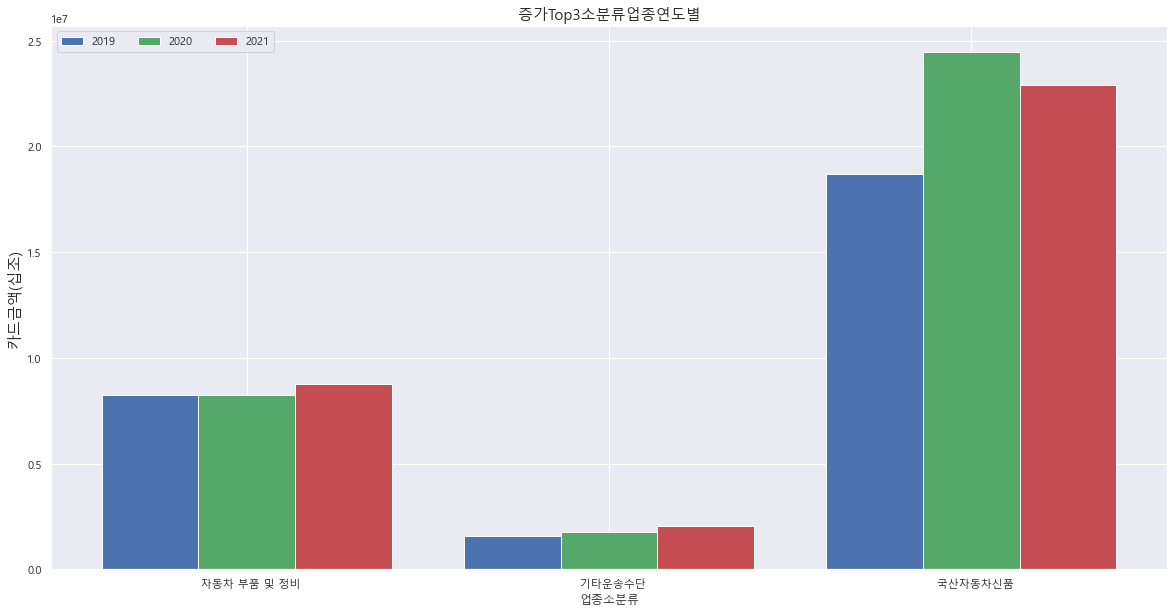

In [101]:
# 증가상세 막대차트로 2019,2020,2021 그리기

plt.figure(figsize=(20,10))

data = [plus_top3_detail_order['2019'],
        plus_top3_detail_order['2020'],
        plus_top3_detail_order['2021']]

color_list = ['b', 'g', 'r']
label_list = ['2019', '2020', '2021']

gap = .8 / len(data)
for i, row in enumerate(data):
    X = np.arange(len(row))
    plt.bar(X + i*gap, row, 
           width = gap, 
           color = color_list[i % len(color_list)],
           label = label_list[i % len(label_list)])
    
plt.xlabel('업종소분류')
plt.ylabel('카드금액(십조)', fontsize=15)    
plt.legend(ncol=3)
plt.title('증가Top3소분류업종연도별', fontsize=15)
plt.xticks(X + gap, plus_top3_detail_order['소비유형코드'])
# plt.ylim(labelsize=20)


plt.show()

In [102]:
# 증가상세로 월별 그래프
plus_top3_detail_order2 = plus_top3_detail_order
plus_top3_detail_order2 = plus_top3_detail_order2.drop(columns = ['지역코드','금액구분코드'])
plus_top3_detail_order2 = plus_top3_detail_order2.set_index('소비유형코드')
plus_top3_detail_order2
# card_minus_top3.iloc[:,0:38]
# np.arange(38)
# len(card_minus_top3.iloc[:,:38].columns)


,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,...,2021/12,2022/01,2022/02,대소분류구분,대분류,2019,2020,2021,2022,20증감률
소비유형코드,,,,,,,,,,,,,,,,,,,,,
자동차 부품 및 정비,656929,544215,681062,644660,722601,686956,698826,739358,640324,727211,...,829157,735397,567042,소분류,자동차,8225209,8222826,8774448,1302439,-0.028972
기타운송수단,114577,109905,149628,131219,144308,143844,136759,135354,121186,131089,...,146693,132037,135860,소분류,자동차,1593976,1764940,2065284,267897,10.725632
국산자동차신품,1424196,1302423,1744513,1687136,1611936,1425672,1485645,1409116,1363670,1588976,...,2020166,1458802,1618709,소분류,자동차,18682974,24489123,22892345,3077511,31.077220


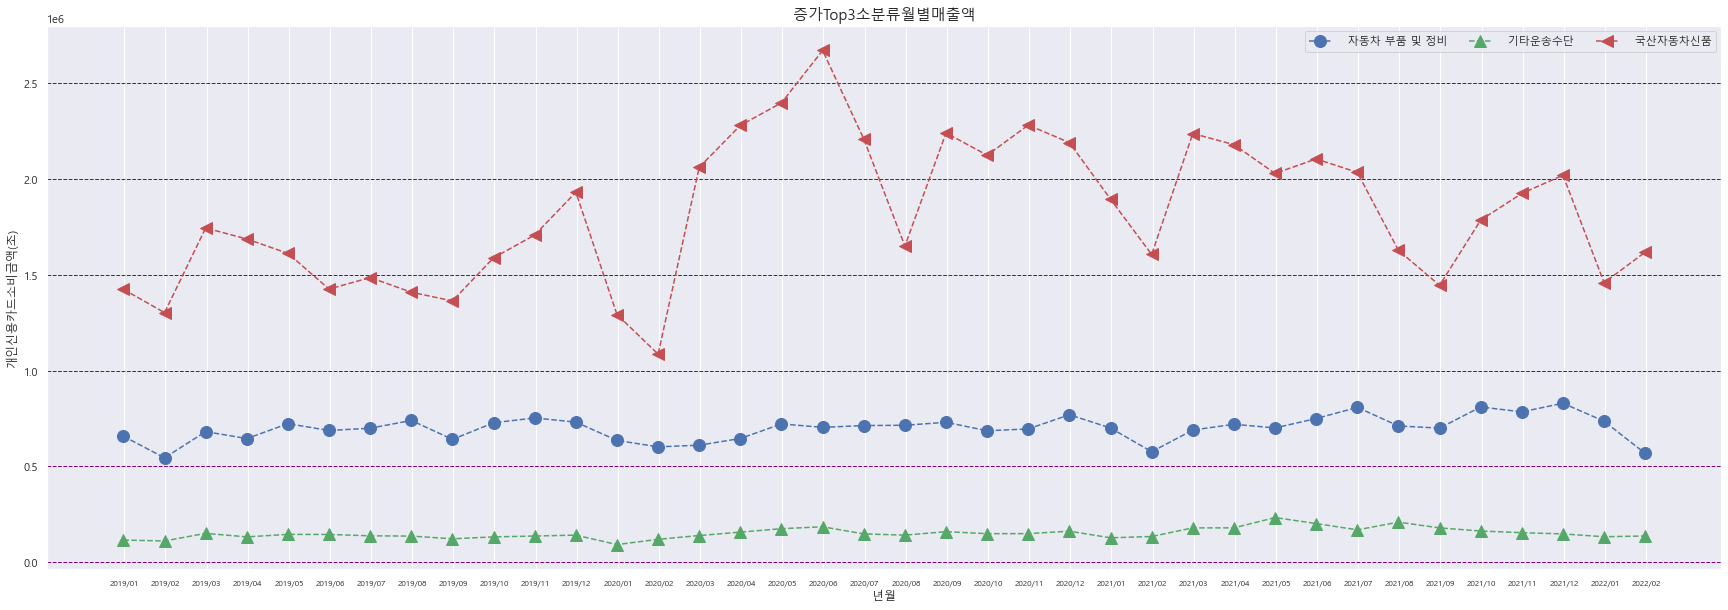

In [105]:
# 증가 소분류 top3 월별 매출액 그리기
plt.figure(figsize=(30,10))

t = np.arange(38)
y = plus_top3_detail_order2.iloc[:,:38].values

color_list = ['b', 'g', 'r']
maker_list = ['o', '^', '<']

for idx in range(len(plus_top3_detail_order2)):
    
    plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
            markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=plus_top3_detail_order2.index[idx])

gap = .8 / len(plus_top3_detail_order2.iloc[:,:38].columns)

plt.xticks(t + gap, plus_top3_detail_order2.iloc[:,:38].columns,fontsize=8)
plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

plt.xlabel('년월')
plt.ylabel('개인신용카드소비금액(조)')
plt.title('증가Top3소분류월별매출액',fontsize=15)
plt.legend(ncol=3)

plt.show()

In [106]:
# 감소 top3 세부업종
minus_top3_merc = card_minus_top3['소비유형코드']
# minus_top3_merc
minus_top3_detail = card_df_detail[card_df_detail['대분류'].isin(minus_top3_merc)]
minus_top3_detail # 교육상세 없음

# 년 합계와 증감률
card_merc_2019 = minus_top3_detail.iloc[:,3:15] 
minus_top3_detail['2019'] = card_merc_2019.sum(axis=1)

card_merc_2020 = minus_top3_detail.iloc[:,15:27] 
minus_top3_detail['2020'] = card_merc_2020.sum(axis=1)

card_merc_2021 = minus_top3_detail.iloc[:,27:39] 
minus_top3_detail['2021'] = card_merc_2021.sum(axis=1)

card_merc_2022 = minus_top3_detail.iloc[:,39:41] 
minus_top3_detail['2022'] = card_merc_2022.sum(axis=1)

minus_top3_detail['20증감률'] = ((minus_top3_detail['2020']-minus_top3_detail['2019'])/minus_top3_detail['2019'])*100
minus_top3_detail_order = minus_top3_detail.sort_values('20증감률')
minus_top3_detail_order


C:\Users\student\AppData\Local\Temp\ipykernel_1860\2175401771.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minus_top3_detail['2019'] = card_merc_2019.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_1860\2175401771.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minus_top3_detail['2020'] = card_merc_2020.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_1860\2175401771.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/12,2022/01,2022/02,대소분류구분,대분류,2019,2020,2021,2022,20증감률
58,전국,항공사,총액,503956,423982,443476,445981,447640,419248,471606,...,58738,100970,90588,소분류,여행/교통,5100336,687330,1062213,191558,-86.523829
56,전국,여행사/자동차임대,총액,172400,116224,119684,121724,130416,121937,151500,...,39283,41570,37589,소분류,여행/교통,1531625,478723,466608,79159,-68.744112
60,전국,대중교통,총액,570806,507773,547363,600598,610105,579192,621196,...,522851,499884,411769,소분류,여행/교통,7200239,5440675,5649270,911653,-24.437578
24,전국,의복/직물,총액,595790,524598,657957,651190,723368,615586,566552,...,587632,505617,400477,소분류,의류/잡화,7529614,6150161,6404847,906094,-18.320368
30,전국,화장품,총액,245217,210548,251921,238668,250431,240902,231100,...,199981,186759,151425,소분류,의류/잡화,2824093,2349868,2226572,338184,-16.792117
28,전국,시계/귀금속/안경,총액,201638,187289,227925,211259,232816,217216,211331,...,195287,195055,168290,소분류,의류/잡화,2474610,2061175,2281498,363345,-16.707077
26,전국,복식잡화,총액,90256,79194,103978,99942,110520,104620,99119,...,99368,89593,73215,소분류,의류/잡화,1182568,1025358,1095825,162808,-13.293950


In [ ]:
minus_top3_detail_order['2019'][minus_top3_detail_order['대분류']=='여행/교통']

In [ ]:
# 감소상세 막대차트로 2019,2020,2021 그리기

data = [minus_top3_detail_order['2019'],
        minus_top3_detail_order['2020'],
        minus_top3_detail_order['2021']]

color_list = ['b', 'g', 'r']

gap = .8 / len(data)
for i, row in enumerate(data):
    X = np.arange(len(row))
    plt.bar(X + i*gap, row, 
           width = gap, 
           color = color_list[i % len(color_list)])
    
plt.xlabel('업종소분류')
plt.ylabel('카드금액(조)')    
plt.legend()

plt.xticks(X + gap, minus_top3_detail_order['소비유형코드'])

plt.show()

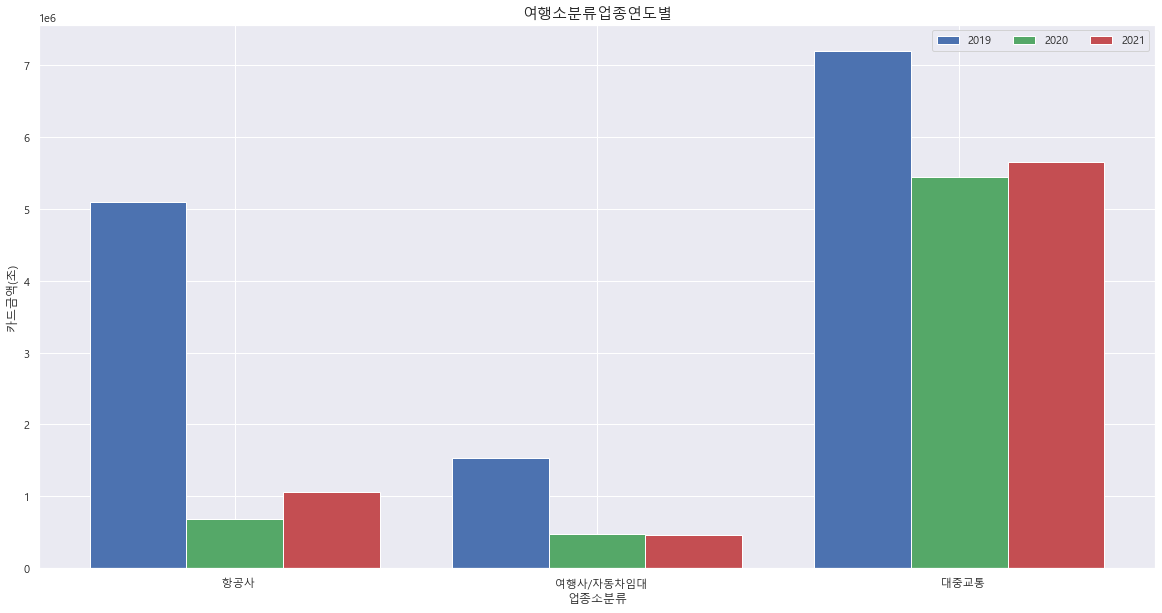

In [110]:
# 감소상세 여행교통
# 감소상세 막대차트로 2019,2020,2021 그리기

plt.figure(figsize=(20,10))

data = [minus_top3_detail_order['2019'][minus_top3_detail_order['대분류']=='여행/교통'],
        minus_top3_detail_order['2020'][minus_top3_detail_order['대분류']=='여행/교통'],
        minus_top3_detail_order['2021'][minus_top3_detail_order['대분류']=='여행/교통']]

color_list = ['b', 'g', 'r']
label_list = ['2019', '2020', '2021']

gap = .8 / len(data)
for i, row in enumerate(data):
    X = np.arange(len(row))
    plt.bar(X + i*gap, row, 
           width = gap, 
           color = color_list[i % len(color_list)],
           label = label_list[i % len(label_list)])
    
plt.xlabel('업종소분류')
plt.ylabel('카드금액(조)')    
plt.legend(ncol=3)
plt.title('여행소분류업종연도별', fontsize=15)
plt.xticks(X + gap, minus_top3_detail_order['소비유형코드'][minus_top3_detail_order['대분류']=='여행/교통'])

plt.show()

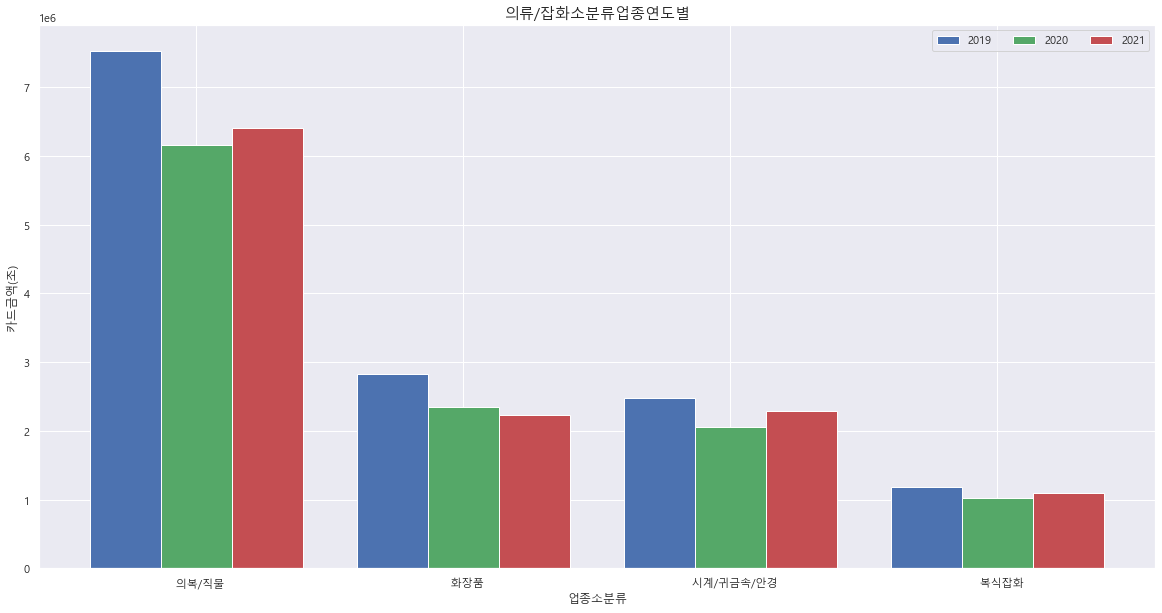

In [111]:
# 감소상세 의류잡화
# 감소상세 막대차트로 2019,2020,2021 그리기

plt.figure(figsize=(20,10))

data = [minus_top3_detail_order['2019'][minus_top3_detail_order['대분류']=='의류/잡화'],
        minus_top3_detail_order['2020'][minus_top3_detail_order['대분류']=='의류/잡화'],
        minus_top3_detail_order['2021'][minus_top3_detail_order['대분류']=='의류/잡화']]

color_list = ['b', 'g', 'r']
label_list = ['2019', '2020', '2021']

gap = .8 / len(data)
for i, row in enumerate(data):
    X = np.arange(len(row))
    plt.bar(X + i*gap, row, 
           width = gap, 
           color = color_list[i % len(color_list)],
           label = label_list[i % len(label_list)])
    
plt.xlabel('업종소분류')
plt.ylabel('카드금액(조)')   
plt.legend(ncol=3)
plt.title('의류/잡화소분류업종연도별', fontsize=15)

plt.xticks(X + gap, minus_top3_detail_order['소비유형코드'][minus_top3_detail_order['대분류']=='의류/잡화'])

plt.show()

In [ ]:
# 감소상세로 월별 그래프
minus_top3_detail_order2 = minus_top3_detail_order
minus_top3_detail_order2 = minus_top3_detail_order2.drop(columns = ['지역코드','금액구분코드'])
minus_top3_detail_order2 = minus_top3_detail_order2.set_index('소비유형코드')
minus_top3_detail_order2
# card_minus_top3.iloc[:,0:38]
# np.arange(38)
# len(card_minus_top3.iloc[:,:38].columns)


In [ ]:
# 감소 소분류 top3 월별 매출액 그리기
plt.figure(figsize=(30,10))

t = np.arange(38)
y = minus_top3_detail_order2.iloc[:,:38].values

color_list = ['b', 'g', 'r', 'c', 'm','y','k']
maker_list = ['o', '^', '<', '>', 's']

for idx in range(len(minus_top3_detail_order2)):
    
    plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
            markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=minus_top3_detail_order2.index[idx])

gap = .8 / len(minus_top3_detail_order2.iloc[:,:38].columns)

plt.xticks(t + gap, minus_top3_detail_order2.iloc[:,:38].columns)
# plt.yticks(labelsize=10)

plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

plt.xlabel('년월')
plt.ylabel('개인신용카드소비금액(천억)',fontsize=10)

# plt.rc('font', size=20)        # 기본 폰트 크기
# plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
# plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
# plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
# plt.rc('legend', fontsize=20)  # 범례 폰트 크기
# plt.rc('figure', titlesize=50) # figure title 폰트 크기

plt.title('감소Top3소분류월별매출액')
plt.legend()

plt.show()

In [ ]:
# 감소 소분류 top3 월별 매출액 그리기 (여행/교통)

plt.figure(figsize=(30,10))

t = np.arange(38)
y = minus_top3_detail_order2[minus_top3_detail_order2['대분류']=='여행/교통'].iloc[:,:38].values

color_list = ['b', 'g', 'r', 'c', 'm','y','k']
maker_list = ['o', '^', '<', '>', 's']

for idx in range(len(minus_top3_detail_order2[minus_top3_detail_order2['대분류']=='여행/교통'])):
    
    plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
            markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=minus_top3_detail_order2[minus_top3_detail_order2['대분류']=='여행/교통'].index[idx])

gap = .8 / len(minus_top3_detail_order2[minus_top3_detail_order2['대분류']=='여행/교통'].iloc[:,:38].columns)

plt.xticks(t + gap, minus_top3_detail_order2[minus_top3_detail_order2['대분류']=='여행/교통'].iloc[:,:38].columns)
# plt.yticks(labelsize=10)

plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

plt.xlabel('년월')
plt.ylabel('개인신용카드소비금액(천억)',fontsize=10)

# plt.rc('font', size=20)        # 기본 폰트 크기
# plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
# plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
# plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
# plt.rc('legend', fontsize=20)  # 범례 폰트 크기
# plt.rc('figure', titlesize=50) # figure title 폰트 크기

plt.title('감소Top3소분류월별매출액')
plt.legend()

plt.show()

In [ ]:
# 감소 소분류 top3 월별 매출액 그리기 (의류/잡화)

plt.figure(figsize=(30,10))

t = np.arange(38)
y = minus_top3_detail_order2[minus_top3_detail_order2['대분류']=='의류/잡화'].iloc[:,:38].values

color_list = ['b', 'g', 'r', 'c', 'm','y','k']
maker_list = ['o', '^', '<', '>', 's']

for idx in range(len(minus_top3_detail_order2[minus_top3_detail_order2['대분류']=='의류/잡화'])):
    
    plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
            markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=minus_top3_detail_order2[minus_top3_detail_order2['대분류']=='의류/잡화'].index[idx])

gap = .8 / len(minus_top3_detail_order2[minus_top3_detail_order2['대분류']=='의류/잡화'].iloc[:,:38].columns)

plt.xticks(t + gap, minus_top3_detail_order2[minus_top3_detail_order2['대분류']=='의류/잡화'].iloc[:,:38].columns)
# plt.yticks(labelsize=10)

plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

plt.xlabel('년월')
plt.ylabel('개인신용카드소비금액(천억)',fontsize=10)

# plt.rc('font', size=20)        # 기본 폰트 크기
# plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
# plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
# plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
# plt.rc('legend', fontsize=20)  # 범례 폰트 크기
# plt.rc('figure', titlesize=50) # figure title 폰트 크기

plt.title('감소Top3소분류월별매출액')
plt.legend()

plt.show()

In [ ]:
# subplot는 최종에 한다.
# 업종별 전년동월대비 증감률
# 전년동월대비 한국은행통계사이트이용

card_df2 = pd.read_excel(card, sheet_name = '전년동기대비증감률',engine='openpyxl')
card_df2.head(1)

In [ ]:
del card_df2['통계표']
del card_df2['변환'] # 단위는 백만원이다.
del card_df2['단위'] 
card_df2

In [ ]:
# 소분류, 대분류 구분 붙이기

merc = list()

for x in range(len(card_df2)):
    if len(card_df2['소비유형코드'][x].split(' '))==1:
        merc.append('대분류')
    else: 
        merc.append('소분류')

In [ ]:
# 원래 DataFrame에 붙이기
card_df2['대소분류구분'] = merc
card_df2

In [ ]:
# for문으로 대분류 소비유형코드 붙이기

merc_dae = list()

for x in range(len(card_df2)):
    if card_df2['대소분류구분'][x]=='대분류':
        merc_dae.append(card_df2['소비유형코드'][x])
    else: 
        merc_dae.append(np.nan)
        
# 오류시 앞의 값으로 채워넣기
card_df2['대분류'] = merc_dae
card_df2 = card_df2.fillna(method='ffill')

In [ ]:
card_df2

In [ ]:
# 전국 데이터, 전체
area_seg = (card_df2.지역코드=='전국') & (card_df2.금액구분코드=='총액') & (card_df2.소비유형코드=='합계')#특정조건만
card_all_var = card_df2[area_seg]
card_all_var

In [ ]:
# 20년도부터 ~ 22년도 2월
card_all_var = card_all_var.iloc[:,15:41]
card_all_var

In [ ]:
# 선그래프

plt.figure(figsize=(30,10))

t = np.arange(26)
y = card_all_var.iloc[0,:].values

plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue', markersize=12 ,label='전년동월대비증감')

gap = .8 / len(y)

plt.xticks(t + gap, card_all_var.iloc[0,:].index)
plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

plt.xlabel('년월')
plt.ylabel('전년동월대비증감률(%)')
plt.title('개인신용카드전년동월대비증감률')
plt.legend()

plt.show()


In [ ]:
# 대분류 업종별 
merc_seg = (card_df2.지역코드=='전국') & (card_df2.금액구분코드=='총액') & (card_df2.소비유형코드!='합계') & (card_df2.대소분류구분=='대분류') #특정조건만
card_merc_var = card_df2[merc_seg]
card_merc_var.head(1)

In [ ]:
# 19년도 컬럼삭제
# card_merc_var.iloc[:,3:15].columns
card_merc_var.drop(columns=card_merc_var.iloc[:,3:15].columns, inplace=True)

# 전국, 총액 삭제
# card_merc_var.iloc[:,3:15].columns
card_merc_var.drop(columns=['지역코드','금액구분코드'], inplace=True)

card_merc_var
# card_merc_var.iloc[:,3:].columns
# card_merc_var.iloc[:,3:].values

In [ ]:
# set_index
card_merc_var.set_index(keys='소비유형코드',inplace=True)
card_merc_var.head(2)

In [ ]:
# 선그래프

plt.figure(figsize=(30,10))

t = np.arange(26)
y = card_merc_var.iloc[:,:26].values

color_list = ['b', 'g', 'r', 'c', 'm','y','k']
maker_list = ['o', '^', '<', '>', 's']

for idx in range(len(card_merc_var)):
    
    plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
            markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=card_merc_var.index[idx])

gap = .8 / len(y)

plt.xticks(t + gap, card_merc_var.iloc[:,:26].columns)
plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

plt.xlabel('년월')
plt.ylabel('전년동월대비증감률(%)')
plt.title('개인신용카드전년동월대비증감률', fontsize=30)
plt.legend()

plt.show()


In [ ]:
# 최종 테이블 구조 확인
# card_plus_top3 
# card_minus_top3
# card_plus_top 
# card_minus_top
# plus_top3_detail_order
# minus_top3_detail_order
# plus_top3_detail_order2
# minus_top3_detail_order2
# card_all_var
# card_merc_var


In [ ]:
# 그림 subplot로 만들기
# 함수로 대분류 증가 y/n, 소분류 증가 y/n, 전체 전년동월대비 증가율, 업종별 증가율 총 6개
# 대분류 증가 y/n

def draw_merc(plus):
    if plus=='y':
    
        data = [card_plus_top3['2019'],
                card_plus_top3['2020'],
                card_plus_top3['2021']]

        color_list = ['b', 'g', 'r']
        label_list = ['2019', '2020', '2021']
        
        gap = .8 / len(data)
        for i, row in enumerate(data):
            X = np.arange(len(row))
            plt.bar(X + i*gap, row, 
                   width = gap, 
                   color = color_list[i % len(color_list)],
                   label = label_list[i % len(label_list)])

        plt.xlabel('업종대분류')
        plt.ylabel('카드금액(백조)')    
        plt.legend()
        plt.title('증가Top3업종연도별', fontsize=15)
        plt.xticks(X + gap, card_plus_top3['소비유형코드'])

#         plt.show()
    elif plus=='n':
        
        data = [card_minus_top3['2019'],
        card_minus_top3['2020'],
        card_minus_top3['2021']]

        color_list = ['b', 'g', 'r']
        label_list = ['2019', '2020', '2021']

        gap = .8 / len(data)
        for i, row in enumerate(data):
            X = np.arange(len(row))
            plt.bar(X + i*gap, row, 
                   width = gap, 
                   color = color_list[i % len(color_list)],
                   label = label_list[i % len(label_list)])

        plt.xlabel('업종대분류')
        plt.ylabel('카드금액(십조)')    
        plt.legend()
        plt.title('감소Top3업종연도별', fontsize=15)
        plt.xticks(X + gap, card_minus_top3['소비유형코드'])

#         plt.show()
    else:
        print("Not Operation !!")
        return

In [ ]:
def draw_merc_mon(plus):
    if plus=='y':
        t = np.arange(38)
        y = card_plus_top.iloc[:,:38].values

        color_list = ['b', 'g', 'r']
        maker_list = ['o', '^', '<']

        for idx in range(len(card_plus_top)):

            plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
                    markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=card_plus_top.index[idx])

        gap = .9 / len(card_plus_top.iloc[:,:38].columns)

        plt.xticks(t + gap, card_plus_top.iloc[:,:38].columns, fontsize=8)
        plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

        plt.xlabel('년월')
        plt.ylabel('개인신용카드소비금액(십조)')
        plt.title('증가Top3월별매출액',fontsize=15)
        plt.legend()
        
    elif plus=='n':
        
        t = np.arange(38)
        y = card_minus_top.iloc[:,:38].values

        color_list = ['b', 'g', 'r']
        maker_list = ['o', '^', '<']

        for idx in range(len(card_minus_top)):

            plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
                    markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=card_minus_top.index[idx])

        gap = .9 / len(card_minus_top.iloc[:,:38].columns)

        plt.xticks(t + gap, card_minus_top.iloc[:,:38].columns, fontsize=8)
        plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

        plt.xlabel('년월')
        plt.ylabel('개인신용카드소비금액(십조)')
        plt.title('감소Top3월별매출액',fontsize=15)
        plt.legend()
    
    else:
        print("Not Operation !!")
        return

In [ ]:
def draw_merc_detail(plus):
    if plus=='y':
        
        data = [plus_top3_detail_order['2019'],
        plus_top3_detail_order['2020'],
        plus_top3_detail_order['2021']]

        color_list = ['b', 'g', 'r']
        label_list = ['2019', '2020', '2021']
        
        gap = .8 / len(data)
        for i, row in enumerate(data):
            X = np.arange(len(row))
            plt.bar(X + i*gap, row, 
                   width = gap, 
                   color = color_list[i % len(color_list)],
                   label = label_list[i % len(label_list)])

        plt.xlabel('업종소분류')
        plt.ylabel('카드금액(십조)')    
        plt.legend()
        plt.title('증가Top3소분류업종연도별', fontsize=15)
        plt.xticks(X + gap, plus_top3_detail_order['소비유형코드'])

    elif plus=='n':        
        # 감소상세 막대차트로 2019,2020,2021 그리기
        data = [minus_top3_detail_order['2019'],
                minus_top3_detail_order['2020'],
                minus_top3_detail_order['2021']]

        color_list = ['b', 'g', 'r']
        label_list = ['2019', '2020', '2021']
                                      
        gap = .8 / len(data)
        for i, row in enumerate(data):
            X = np.arange(len(row))
            plt.bar(X + i*gap, row, 
                   width = gap, 
                   color = color_list[i % len(color_list)],
                   label = label_list[i % len(label_list)])

        plt.xlabel('업종소분류')
        plt.ylabel('카드금액(조)')    
        plt.legend()
        plt.title('감소Top3소분류업종연도별', fontsize=15)
        plt.xticks(X + gap, minus_top3_detail_order['소비유형코드'])
    else:
        print("Not Operation !!")
        return        

In [ ]:
def draw_merc_detail_mon(plus):
    if plus=='y':
        t = np.arange(38)
        y = plus_top3_detail_order2.iloc[:,:38].values

        color_list = ['b', 'g', 'r']
        maker_list = ['o', '^', '<']

        for idx in range(len(plus_top3_detail_order2)):

            plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
                    markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=plus_top3_detail_order2.index[idx])

        gap = .9 / len(plus_top3_detail_order2.iloc[:,:38].columns)

        plt.xticks(t + gap, plus_top3_detail_order2.iloc[:,:38].columns,fontsize=8)
        plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

        plt.xlabel('년월')
        plt.ylabel('개인신용카드소비금액(십조)')
        plt.title('증가Top3소분류월별매출액',fontsize=15)
        plt.legend()
        
    elif plus=='n':
        
        t = np.arange(38)
        y = minus_top3_detail_order2.iloc[:,:38].values

        color_list = ['b', 'g', 'r', 'c', 'm','y','k']
        maker_list = ['o', '^', '<', '>', 's']

        for idx in range(len(minus_top3_detail_order2)):

            plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
                    markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=minus_top3_detail_order2.index[idx])

        gap = .9 / len(minus_top3_detail_order2.iloc[:,:38].columns)

        plt.xticks(t + gap, minus_top3_detail_order2.iloc[:,:38].columns,fontsize=8)
        # plt.yticks(labelsize=10)

        plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

        plt.xlabel('년월')
        plt.ylabel('개인신용카드소비금액(천억)',fontsize=15)
        plt.title('감소Top3소분류월별매출액')
        plt.legend(loc=2,ncol=7)
        
    else:
        print("Not Operation !!")
        return   

In [ ]:
def draw_yty(merc):
    if merc=='n':
        t = np.arange(26)
        y = card_all_var.iloc[0,:].values

        plt.plot(t, y, color='green', linestyle='dashed', marker='o',
                markerfacecolor = 'blue', markersize=12 ,label='개인신용카드')

        gap = .8 / len(y)

        plt.xticks(t + gap, card_all_var.iloc[0,:].index)
        plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

        plt.xlabel('년월')
        plt.ylabel('전년동월대비증감률(%)')
        plt.title('개인신용카드전년동월대비증감률', fontsize=15)
        plt.legend()
        
    elif merc=='y':
        t = np.arange(26)
        y = card_merc_var.iloc[:,:26].values

        color_list = ['b', 'g', 'r', 'c', 'm','y','k']
        maker_list = ['o', '^', '<', '>', 's']

        for idx in range(len(card_merc_var)):

            plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
                    markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=card_merc_var.index[idx])

        gap = .8 / len(y)

        plt.xticks(t + gap, card_merc_var.iloc[:,:26].columns)
        plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

        plt.xlabel('년월')
        plt.ylabel('전년동월대비증감률(%)')
        plt.title('개인신용카드전년동월대비증감률', fontsize=15)
        plt.legend(loc=2, ncol=5)
        
    else:
        print("Not Operation !!")
        return        

In [ ]:
plt.figure(figsize=(25,60))

plt.subplot(821) 
draw_merc('y')

plt.subplot(822) 
draw_merc('n')

plt.subplot(812) 
draw_merc_mon('y')

plt.subplot(813) 
draw_merc_mon('n')

plt.subplot(827) 
draw_merc_detail('y')

plt.subplot(828) 
draw_merc_detail('n')

plt.subplot(815) 
draw_merc_detail_mon('y')

plt.subplot(816) 
draw_merc_detail_mon('n')

plt.subplot(817) 
draw_yty('n') 

plt.subplot(818) 
draw_yty('y') 

plt.show()

In [ ]:
# 선언
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline

In [ ]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

In [ ]:
# 자동차 국산자동차 신품 왜 20.2, 20.3월 늘었나? 특히 20.6월
# 00. 셀리니움으로 캠쳐 삼성경제연구소 보고서
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from IPython.display import Image
from urllib.request import urlopen

import pandas as pd
import time
import re

In [ ]:
# 띄우고 웹 캡쳐
driver_path = "../../../driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

In [ ]:
# 구글 -> 네이버 검색 영화이동
url_page = 'https://www.google.com/'
driver.get(url_page)

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

In [ ]:
# 검색창 검색어 입력
css_selector = 'body > div.L3eUgb > div.o3j99.ikrT4e.om7nvf > form > div:nth-child(1) > div.A8SBwf > div.RNNXgb > div > div.a4bIc > input'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).send_keys('코로나 자동차 신차 산업')

In [ ]:
# 앤터키 입력
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).send_keys(Keys.ENTER)

In [ ]:
# 세번째 클릭
css_selector = '#rso > div:nth-child(5) > div > div > div.yuRUbf > a > h3'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [ ]:
# 귀찮으니까 바로 캡쳐하기
capture_img = './images/car_web_data.png'
driver.save_screenshot(capture_img)
Image(capture_img)

In [ ]:
import pandas as pd
import numpy as np
import time
import re

In [ ]:
# 01. 등록대수가 전년동기대비 나중에 늘었다.

# 데이터 불러오기

car = 'data\car2.xlsx'

card_df3 = pd.read_excel(car, sheet_name = '등록대수',engine='openpyxl')
card_df3.head(1)

In [ ]:
# 대분류 업종별 
# merc_seg = (card_df2.지역코드=='전국') & (card_df2.금액구분코드=='총액') & (card_df2.소비유형코드!='합계') & (card_df2.대소분류구분=='대분류') #특정조건만
# card_merc_var = card_df2[merc_seg]
# card_merc_var.head(1)

In [ ]:
card_df3_fillter = (card_df3.구분코드=='자가용')
card_df3_p = card_df3[card_df3_fillter]
card_df3_p.head(1)

In [ ]:
# 연도별 월별 합계
card_df3_p2 = card_df3_p.iloc[:,5:]
card_df3_p2

In [ ]:
card_df3_p2.groupby("연")['01'].sum()

In [ ]:
card_df3_p3 = card_df3_p2.groupby(["연"]).agg({"01":"sum","02":"sum","03":"sum","04":"sum","05":"sum","06":"sum","07":"sum","08":"sum","09":"sum","10":"sum","11":"sum","12":"sum"})
card_df3_p3

In [ ]:
# card_df3_p3.columns

In [ ]:
# card_df3_p3.index[0:4]

In [ ]:
# round(((card_df3_p3.iloc[1][0] - card_df3_p3.iloc[0][0]) / card_df3_p3.iloc[0][0])*100,1)

In [ ]:
car_Reg = list()

for x in range(0,4):
    car_Reg2 = list()
    for y in range(len(card_df3_p3.columns)):
        car_reg = round(((card_df3_p3.iloc[x+1][y] - card_df3_p3.iloc[x][y]) / card_df3_p3.iloc[x][y])*100,1)
        car_Reg2.append(car_reg)
    car_Reg.append(car_Reg2)
car_Reg

In [ ]:
# len(car_Reg)
type(car_Reg)

In [ ]:
# 전년동기대비 증가율
# 음수 none
card_df3_p4 = pd.DataFrame(data = car_Reg,index=card_df3_p3.index[1:], columns=card_df3_p3.columns)
card_df3_p4.iloc[3,5:] = None
card_df3_p4

In [ ]:
np.arange(len(card_df3_p3.columns))

In [ ]:
# 증감률 데이터 그리기
# 결론 : 논문의 보고와 같이 차량 등록대수 전년동기대비 증가율은 20.1 ~ 20.2월에 줄었다가 20.3~해서 증가하였다.

t = np.arange(len(card_df3_p4.columns))
y = card_df3_p4.values

color_list = ['b', 'g', 'r', 'c']
maker_list = ['o', '^', '<', '>']

for idx in range(len(card_df3_p4)):

    plt.plot(t, y[idx], color = color_list[idx], linestyle='dashed', marker=maker_list[idx],
            markerfacecolor = color_list[idx], markersize=12 ,label=card_df3_p4.index[idx])

gap = .8 / len(t)

plt.xticks(t + gap, card_df3_p4.columns)
plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

plt.xlabel('년월')
plt.ylabel('전년동월대비증감률(%)')
plt.title('자동차등록대수전년동월대비증가율', fontsize=15)
plt.legend(ncol=4)

plt.show()

In [ ]:
# 연도별 매출액 seaborn 히트맵/ 월평균 매출액으로 축을 늘린다.
# 세로 업종별, 가로 연도별

In [11]:
card_merc2 = card_merc.set_index('소비유형코드')
card_merc2

,지역코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,...,2022/02,대소분류구분,2019,2020,2021,2022,19월평균,20월평균,21월평균,22월평균
소비유형코드,,,,,,,,,,,,,,,,,,,,,
종합소매,전국,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,6896010,...,6265129,대분류,81715140,79868221,85135882,13899836,6809595.0,6655685.0,7094657.0,6949918.0
전자상거래/통신판매,전국,총액,7595436,6670919,7741855,7495993,7817066,7285161,7836989,7560020,...,11902937,대분류,93396977,116325130,140920641,25065101,7783081.0,9693761.0,11743387.0,12532550.0
식료품,전국,총액,838711,778584,703205,697603,760900,709244,679288,751927,...,798669,대분류,9245565,10266212,11354587,2084259,770464.0,855518.0,946216.0,1042130.0
의류/잡화,전국,총액,1132901,1001630,1241781,1201059,1317136,1178323,1108101,1020957,...,793406,대분류,14010886,11586564,12008740,1770430,1167574.0,965547.0,1000728.0,885215.0
연료,전국,총액,2507052,2216700,2524854,2504898,2716282,2583850,2566747,2748775,...,2632130,대분류,31078595,27031131,32051237,5578660,2589883.0,2252594.0,2670936.0,2789330.0
가구/가전,전국,총액,1262882,1163903,1430280,1268250,1428125,1230078,1313486,1284287,...,1187513,대분류,15099752,16095290,15790436,2471281,1258313.0,1341274.0,1315870.0,1235640.0
의료/보건,전국,총액,3633792,3066496,3487020,3368808,3528229,3373985,3492110,3550365,...,3652065,대분류,41557715,41788064,45243818,7835886,3463143.0,3482339.0,3770318.0,3917943.0
자동차,전국,총액,2195702,1956543,2575204,2463015,2478845,2256471,2321229,2283828,...,2321611,대분류,28502158,34476890,33732074,4647846,2375180.0,2873074.0,2811006.0,2323923.0
여행/교통,전국,총액,1247162,1047980,1110523,1168304,1188161,1120378,1244302,1141198,...,539946,대분류,13832202,6606730,7178093,1182370,1152684.0,550561.0,598174.0,591185.0


In [12]:
# YEAR, 업종대분류, 월평균 매출액
card_merc2 = card_merc[['소비유형코드','19월평균','20월평균','21월평균','22월평균']]
card_merc2

,소비유형코드,19월평균,20월평균,21월평균,22월평균
2,종합소매,6809595.0,6655685.0,7094657.0,6949918.0
14,전자상거래/통신판매,7783081.0,9693761.0,11743387.0,12532550.0
16,식료품,770464.0,855518.0,946216.0,1042130.0
22,의류/잡화,1167574.0,965547.0,1000728.0,885215.0
32,연료,2589883.0,2252594.0,2670936.0,2789330.0
34,가구/가전,1258313.0,1341274.0,1315870.0,1235640.0
40,의료/보건,3463143.0,3482339.0,3770318.0,3917943.0
46,자동차,2375180.0,2873074.0,2811006.0,2323923.0
54,여행/교통,1152684.0,550561.0,598174.0,591185.0
62,오락/문화,1357996.0,1177240.0,1309282.0,1077086.0


In [13]:
card_merc3 = card_merc2.reset_index(drop=True)
card_merc3

,소비유형코드,19월평균,20월평균,21월평균,22월평균
0,종합소매,6809595.0,6655685.0,7094657.0,6949918.0
1,전자상거래/통신판매,7783081.0,9693761.0,11743387.0,12532550.0
2,식료품,770464.0,855518.0,946216.0,1042130.0
3,의류/잡화,1167574.0,965547.0,1000728.0,885215.0
4,연료,2589883.0,2252594.0,2670936.0,2789330.0
5,가구/가전,1258313.0,1341274.0,1315870.0,1235640.0
6,의료/보건,3463143.0,3482339.0,3770318.0,3917943.0
7,자동차,2375180.0,2873074.0,2811006.0,2323923.0
8,여행/교통,1152684.0,550561.0,598174.0,591185.0
9,오락/문화,1357996.0,1177240.0,1309282.0,1077086.0


In [14]:
df_1 = pd.DataFrame({'mon_amt' : list(round(card_merc3['19월평균']/10000).astype('int64')), 'year':2019, 'merc' : list(card_merc3['소비유형코드'])}) #단위 : 백억원
df_2 = pd.DataFrame({'mon_amt' : list(round(card_merc3['20월평균']/10000).astype('int64')), 'year':2020, 'merc' : list(card_merc3['소비유형코드'])})
df_3 = pd.DataFrame({'mon_amt' : list(round(card_merc3['21월평균']/10000).astype('int64')), 'year':2021, 'merc' : list(card_merc3['소비유형코드'])})
df_4 = pd.DataFrame({'mon_amt' : list(round(card_merc3['22월평균']/10000).astype('int64')), 'year':2022, 'merc' : list(card_merc3['소비유형코드'])})
df_5 = pd.concat([df_1,df_2,df_3,df_4])
df_5

,mon_amt,year,merc
0,681,2019,종합소매
1,778,2019,전자상거래/통신판매
2,77,2019,식료품
3,117,2019,의류/잡화
4,259,2019,연료
5,126,2019,가구/가전
6,346,2019,의료/보건
7,238,2019,자동차
8,115,2019,여행/교통
9,136,2019,오락/문화


In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc = {"axes.unicode_minus":False}, style='darkgrid')

In [113]:
import matplotlib.font_manager as fm
# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list.sort()
font_list

['Agency FB',
 'Agency FB',
 'Algerian',
 'Ami R',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Bahnschrift',
 'Baskerville Old Face',
 'Batang',
 'Bauhaus 93',
 'Bell MT',
 'Bell MT',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB',
 'Berlin Sans FB Demi',
 'Bernard MT Condensed',
 'Blackadder ITC',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Book Antiqua',
 'Book Antiqua',
 'Book Antiqua',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookman Old Style',
 'Bookman Old Style',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Britannic Bold',
 'Broadway',
 'Brush Script MT',
 'Calibri',
 'Calibri',
 'Calibri',
 'Calibri',
 'Calibri',
 'Calibri',
 'Californian FB',
 'Californian FB',
 'Californian FB',
 'Calisto MT',
 'Calisto MT',
 'Calisto MT',
 'Calisto MT',
 'Cambri

<AxesSubplot:title={'center':'대분류업종별월평균금액(단위:백억원)'}, xlabel='year', ylabel='merc'>

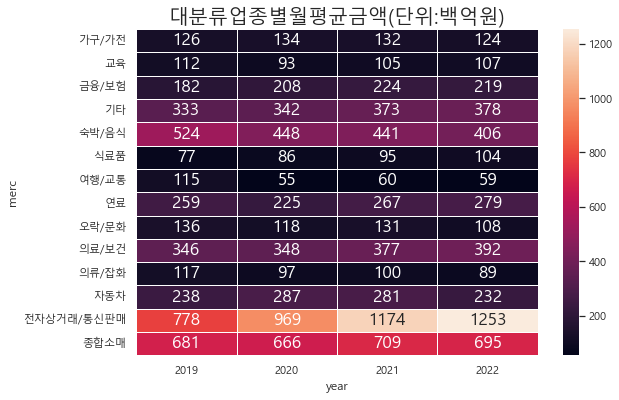

In [118]:
df_6 = df_5.pivot("merc", "year", "mon_amt")
f, ax = plt.subplots(figsize=(9, 6))
plt.title('대분류업종별월평균금액(단위:백억원)', fontsize=20)
sns.heatmap(df_6, annot=True, fmt="d", linewidths=.5, ax=ax, annot_kws = {'size':17})